In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Wannier function for *free* electrons 

In [2]:
pi = np.pi

In [39]:
# formatting axes
def format_func_x(value, tick_number):
    # Set major ticks at multiples of \pi
    n = int(np.round(3*value / pi))
    if n == 0:
        return "0"
    elif n == 1:
        return r"$\frac{\pi}{3a}$"
    elif n == -1:
        return r"$-\frac{\pi}{3a}$"
    else:
        return r'$\frac{{{}\pi}}{{3a}}$'.format(n)
        # return r'{}$a$'.format(n)

def format_func_y(value, tick_number):
    # Set major ticks at multiples of \pi^2
    n = int(np.round(value))
    if n == 0:
        return "0"
    else:
        return r"{}$t$".format(n)
    
from matplotlib.ticker import MultipleLocator, FuncFormatter
    

E1: 0.25755710991019476
E2: 0.2575854138440412


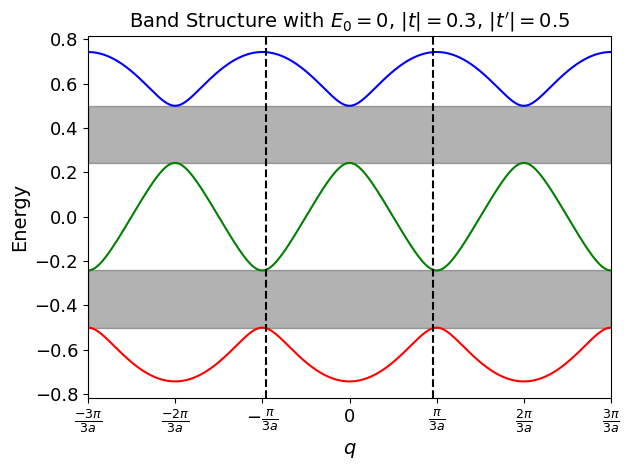

In [71]:
def Hq(q, p, t, E0, a):
    # Construct Hamiltonian matrix for each q
    H_matrices = np.array([
        [E0, t, p*np.exp(-1j*q*3*a)],
        [t, E0, t],
        [p*np.exp(1j*q*3*a), t, E0]
    ])
    return H_matrices


def eigenvalues(q, p, t, E0, a):
    return np.linalg.eigvalsh(Hq(q, p, t, E0, a))

def plot(p, t, E0, a, N):
    q_grid = np.linspace(-1* np.pi / a, 1* np.pi / a, N)
    all_eigenvalues = [eigenvalues(q, p, t, E0, a) for q in q_grid]
    c = ['r', 'g', 'b', 'purple', 'orange']

    fig, ax = plt.subplots()

    last_max = 0
    for i in range(3):
        ei = [e[i] for e in all_eigenvalues]
        ax.plot(q_grid, ei, label=f'n = {i+1}', color=c[i])

        if i > 0:
            print(f'E{i}: {np.min(ei)-last_max}')
            # plt.axhline(last_max)
            # plt.axhline(np.min(ei))
            plt.axhspan(last_max, np.min(ei), alpha=0.3, color='k')
        last_max = np.max(ei)
        # print(all_eigenvalues)
        #    print(np.min(ei), np.max(ei), -np.min(ei)+np.max(ei))

    ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/3))
    ax.xaxis.set_major_formatter(FuncFormatter(format_func_x))
    # ax.yaxis.set_major_locator(MultipleLocator(base=t))
    # ax.yaxis.set_major_formatter(FuncFormatter(format_func_y))
    ax.set_xlim(-1* np.pi / a, 1* np.pi / a)
    plt.title('Band Structure with $E_0 = 0$, $|t| = {0}$, $|t\'|={1}$'.format(abs(t), abs(p)), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ylabel('Energy', fontsize=14)
    ax.set_xlabel('$q$', fontsize=14)
    plt.axvline(1, color='k', linestyle='--')
    plt.axvline(-1, color='k', linestyle='--')
    
    plt.tight_layout()
    # plt.savefig('as1.png', dpi=300)
t, p = -0.3,-0.5
# t, p = -.5,-1
# t, p = -1,-1
E0 = 0
a = 1
N = 1000
plot(p, t, E0, a, N)